# Classical Machine Learning for Image Classification

Welcome to this educational journey through classical machine learning approaches for image classification!
Session 1: From Linear Regression to Basic Neural Networks

Author: [Parham Kebria, PhD](https://parhamkebria.com)

### In this notebook, we'll explore:

1.  **Data Loading & Preprocessing** - MNIST handwritten digits dataset
2.  **Linear Regression** - The simplest approach (and why it struggles)
3.  **Logistic Regression** - A better fit for classification
4.  **Multi-Layer Perceptron (MLP)** - Adding hidden layers
5.  **Simple Neural Network with PyTorch** - Modern implementation

### By the end of this session, you'll understand:

- How classical ML methods work on image data
- Their limitations and computational challenges
- Why we need deep learning for complex image tasks

### Let's start our journey!


## 📄 Copyright & License Notice

**© 2025 Parham Kebria. All Rights Reserved.**

This notebook is protected by copyright law. Unauthorized reproduction, distribution, modification, or commercial use is strictly prohibited without written permission from the author.

**Permitted Use:**

- Personal learning and education
- Academic research (with proper citation)
- Classroom instruction (with attribution)

**Prohibited Use:**

- Commercial redistribution
- Modification without permission
- Removal of copyright notices
- Claiming authorship

**Citation Required:** When referencing this work, please cite:

```
Kebria, P. (2025). Classical Machine Learning for Image Classification.
```

**Contact:** For licensing inquiries, contact [Parham Kebria](https://parhamkebria.com)

---


## 1. Import Required Libraries

Let's start by importing all the libraries we'll need for our classical ML exploration.


In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import matplotlib.colors as mcolors
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# PyTorch for neural networks
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("All libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"SciKit-Learn version: {skl.__version__}")
print(f"PyTorch version: {torch.__version__}")

All libraries imported successfully!
NumPy version: 1.26.0
Pandas version: 2.3.3
SciKit-Learn version: 1.7.2
PyTorch version: 2.2.2


## 2. Download and Load MNIST Dataset

[MNIST](https://ieeexplore.ieee.org/document/6296535) (Modified National Institute of Standards and Technology) is a classic dataset of handwritten digits (0-9). Each image is 28x28 pixels in grayscale.

**Why MNIST?**

- Simple and well-understood
- Small enough to run quickly
- Perfect for learning fundamentals
- Industry standard benchmark


In [2]:
# Download MNIST dataset
print("Downloading MNIST dataset... (this may take a moment)")
start_time = time.time()

# Fetch MNIST data from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype(int)

download_time = time.time() - start_time
print(f"Dataset downloaded in {download_time:.2f} seconds")

# Display basic information
print(f"\nDataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Data type: {X.dtype}")
print(f"Label range: {y.min()} to {y.max()}")
print(f"Number of classes: {len(np.unique(y))}")

# Check data range
print(f"\nPixel value range: {X.min()} to {X.max()}")
print(f"Total number of pixels per image: {X.shape[1]} (28x28 = {28*28})")

Dataset downloaded in 5.06 seconds

Dataset shape: (70000, 784)
Labels shape: (70000,)
Data type: int64
Label range: 0 to 9
Number of classes: 10

Pixel value range: 0 to 255
Total number of pixels per image: 784 (28x28 = 784)


## 3. Data Exploration and Visualization

Let's visualize some sample images to understand what we're working with.


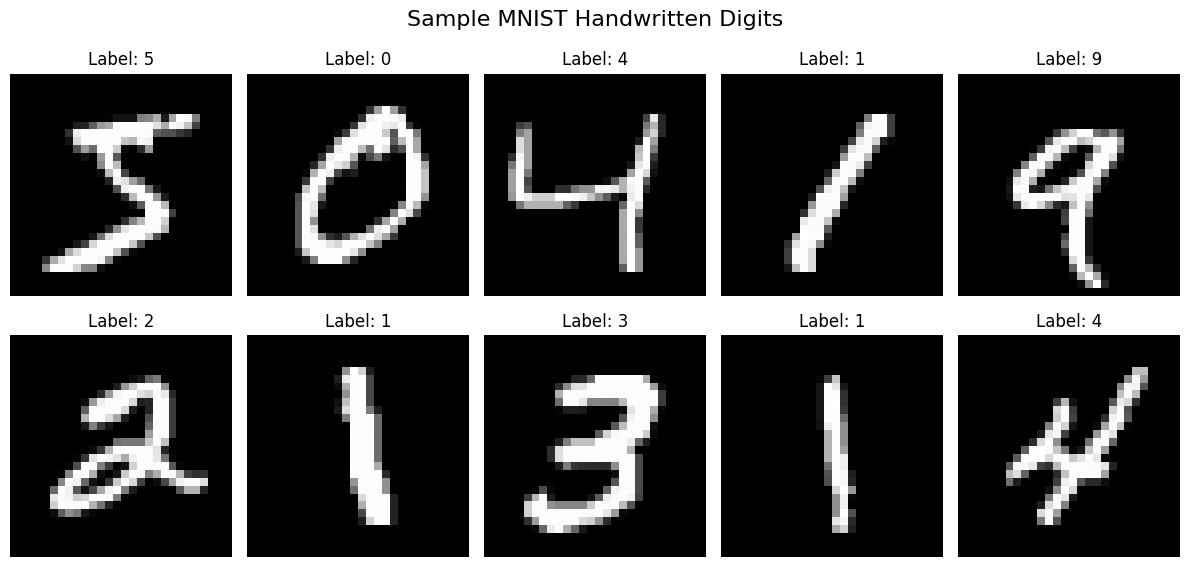

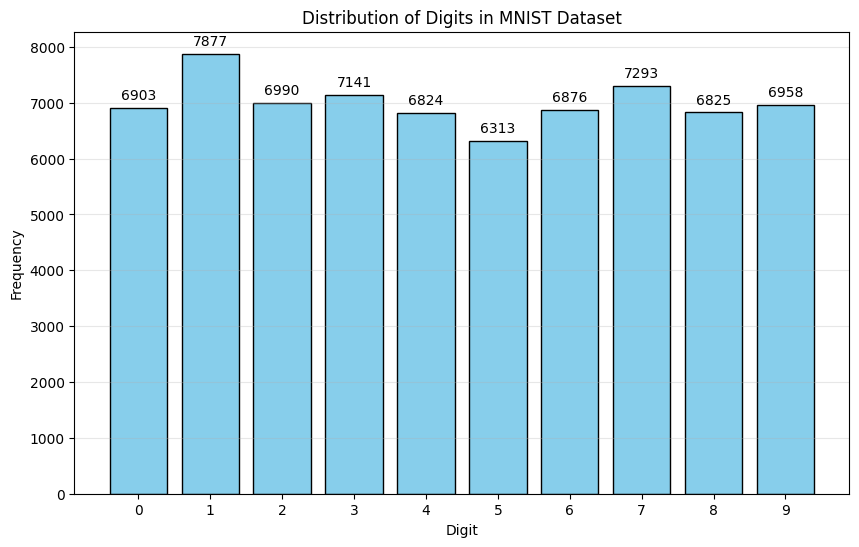

Class distribution:
Digit 0: 6,903 samples (9.9%)
Digit 1: 7,877 samples (11.3%)
Digit 2: 6,990 samples (10.0%)
Digit 3: 7,141 samples (10.2%)
Digit 4: 6,824 samples (9.7%)
Digit 5: 6,313 samples (9.0%)
Digit 6: 6,876 samples (9.8%)
Digit 7: 7,293 samples (10.4%)
Digit 8: 6,825 samples (9.8%)
Digit 9: 6,958 samples (9.9%)


In [3]:
# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Handwritten Digits', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5
    
    # Reshape from 784 to 28x28
    image = X[i].reshape(28, 28)
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Label: {y[i]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show class distribution
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Digits in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.show()

print("Class distribution:")
for digit, count in zip(unique, counts):
    percentage = (count / len(y)) * 100
    print(f"Digit {digit}: {count:,} samples ({percentage:.1f}%)")

## 4. Data Preprocessing

Before applying machine learning algorithms, we need to prepare our data:

1. **Train-Test Split**: Separate data for training and evaluation
2. **Normalization**: Scale pixel values to [0,1] range for better performance
3. **Data Reduction**: Use a subset for faster experimentation


In [4]:
# Use a subset of data for faster experimentation (first 10,000 samples)
# In practice, you'd use the full dataset, but this helps with learning
n_samples = 10000
X_subset = X[:n_samples]
y_subset = y[:n_samples]

print(f"Using {n_samples:,} samples for faster experimentation")
print(f"Subset shape: {X_subset.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_subset  # Ensure balanced splits
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")

# Normalize pixel values to [0, 1] range
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print(f"Normalized pixel range: [{X_train_normalized.min():.1f}, {X_train_normalized.max():.1f}]")

# Create a copy for later use with different preprocessing
X_train_original = X_train.copy()
X_test_original = X_test.copy()

print("Data preprocessing completed!")

Using 10,000 samples for faster experimentation
Subset shape: (10000, 784)
Training set: 8,000 samples
Test set: 2,000 samples
Normalized pixel range: [0.0, 1.0]
Data preprocessing completed!


## 5. Method 1: Linear Regression (Naive Approach)

**Why Linear Regression?**

- Simplest possible approach
- Treats classification as regression problem
- Good starting point to understand limitations

**The Problem**: Linear regression assumes continuous output, but we have discrete classes (0-9).

**What we'll do**:

- Treat each class as a number (0, 1, 2, ..., 9)
- Round predictions to nearest integer
- See why this doesn't work well!


Training Linear Regression...
Training time: 7.04 seconds
Accuracy: 0.233 (23.2%)

Example predictions:
True Label | Continuous Pred | Rounded Pred
----------------------------------------
    8      |      5.88      |      6     
    2      |      1.78      |      2     
    1      |      1.23      |      1     
    2      |      3.37      |      3     
    9      |      6.21      |      6     


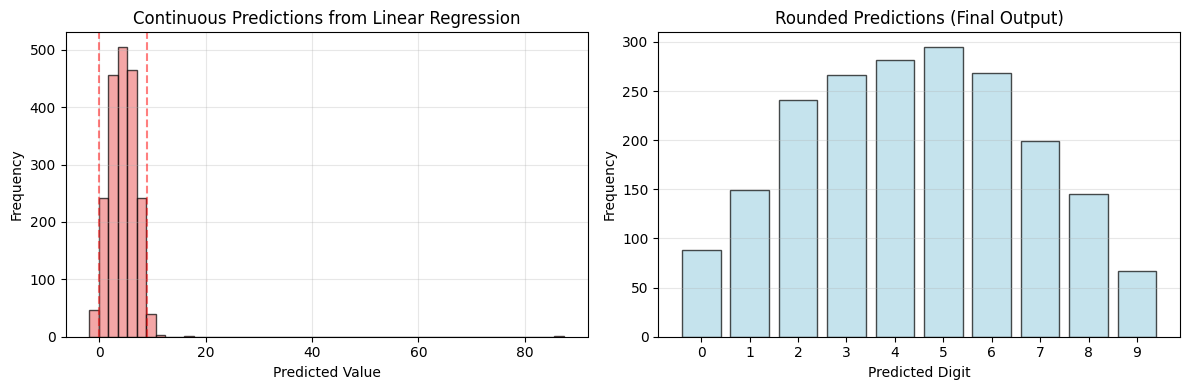


Linear Regression Issues:
- Treats classes as numbers (assumes 9 > 8 > 7 > ... > 0)
- Can predict impossible values (negative numbers, > 9)
- Doesn't understand class boundaries
- Poor accuracy: 23.2%
- Not suitable for classification tasks!


In [5]:
# Linear Regression for Classification (not recommended, but educational!)
print("Training Linear Regression...")
start_time = time.time()

# Create and train linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_normalized, y_train)

# Make predictions
y_pred_continuous = linear_reg.predict(X_test_normalized)
y_pred_linear = np.round(y_pred_continuous).astype(int)

# Clip predictions to valid range [0, 9]
y_pred_linear = np.clip(y_pred_linear, 0, 9)

LR_training_time = time.time() - start_time

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Training time: {LR_training_time:.2f} seconds")
print(f"Accuracy: {accuracy_linear:.3f} ({accuracy_linear*100:.1f}%)")

# Show some example predictions
print("\nExample predictions:")
print("True Label | Continuous Pred | Rounded Pred")
print("-" * 40)
for i in range(5):
    true_label = y_test[i]
    cont_pred = y_pred_continuous[i]
    round_pred = y_pred_linear[i]
    print(f"{true_label:^10} | {cont_pred:^14.2f} | {round_pred:^11}")

# Show prediction distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_pred_continuous, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Continuous Predictions from Linear Regression')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.axvline(9, color='red', linestyle='--', alpha=0.5)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
unique_pred, counts_pred = np.unique(y_pred_linear, return_counts=True)
plt.bar(unique_pred, counts_pred, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Rounded Predictions (Final Output)')
plt.xlabel('Predicted Digit')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nLinear Regression Issues:")
print(f"- Treats classes as numbers (assumes 9 > 8 > 7 > ... > 0)")
print(f"- Can predict impossible values (negative numbers, > 9)")
print(f"- Doesn't understand class boundaries")
print(f"- Poor accuracy: {accuracy_linear:.1%}")
print(f"- Not suitable for classification tasks!")

## 6. Method 2: Logistic Regression (Better Approach)

**Why Logistic Regression?**

- Designed specifically for classification
- Uses probability-based predictions
- Can handle multiple classes (one-vs-rest or multinomial)
- Much more appropriate than linear regression

**How it works**:

- Uses logistic (sigmoid) function to map any real number to [0,1]
- For multi-class: uses softmax function
- Predicts class probabilities, then selects highest probability


Training Logistic Regression...
Training time: 2.38 seconds
Accuracy: 0.901 (90.1%)

Example predictions with probabilities:
True | Pred | Max Prob | Top 3 Probabilities
--------------------------------------------------
 8   |  8   |  0.998   | 8:0.998, 5:0.002, 9:0.000
 2   |  2   |  0.998   | 2:0.998, 8:0.001, 1:0.001
 1   |  1   |  0.998   | 1:0.998, 3:0.001, 2:0.000
 2   |  2   |  1.000   | 2:1.000, 3:0.000, 5:0.000
 9   |  9   |  0.739   | 9:0.739, 7:0.231, 3:0.022


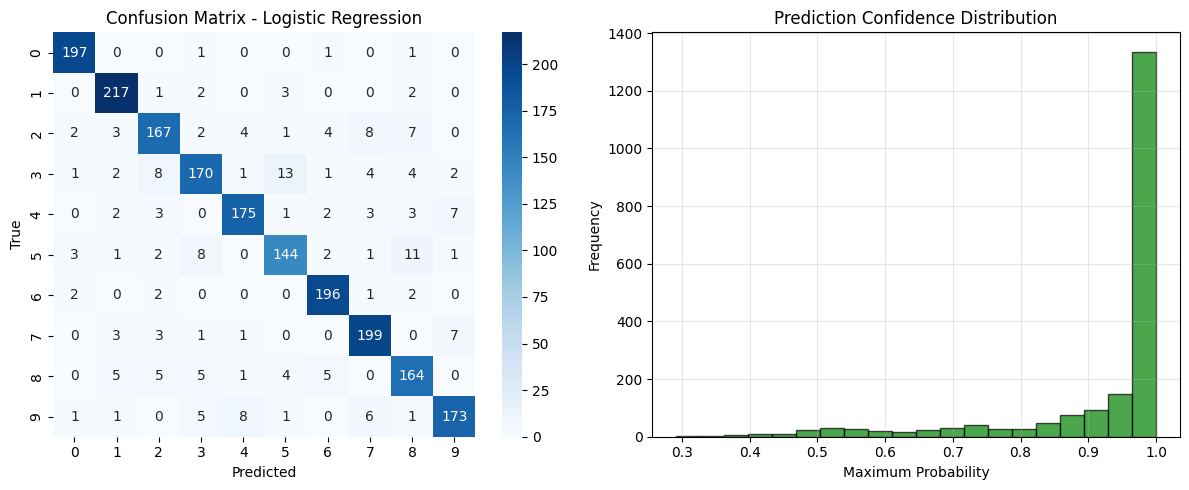


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       200
           1       0.93      0.96      0.95       225
           2       0.87      0.84      0.86       198
           3       0.88      0.83      0.85       206
           4       0.92      0.89      0.91       196
           5       0.86      0.83      0.85       173
           6       0.93      0.97      0.95       203
           7       0.90      0.93      0.91       214
           8       0.84      0.87      0.85       189
           9       0.91      0.88      0.90       196

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000


Logistic Regression Improvements:
- Proper classification algorithm
- Uses probabilities instead of raw numbers
- Much better accuracy: 90.1%
- Provides confidence scores
- Still limited by linear decision b

In [6]:
# Logistic Regression for Multi-class Classification
print("Training Logistic Regression...")
start_time = time.time()

# Create and train logistic regression model
# Using 'lbfgs' solver for better convergence, increased max_iter
logistic_reg = LogisticRegression(
    multi_class='multinomial',  # Use multinomial for true multi-class
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

logistic_reg.fit(X_train_normalized, y_train)

# Make predictions
y_pred_logistic = logistic_reg.predict(X_test_normalized)
y_pred_proba = logistic_reg.predict_proba(X_test_normalized)

LgR_training_time = time.time() - start_time

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f"Training time: {LgR_training_time:.2f} seconds")
print(f"Accuracy: {accuracy_logistic:.3f} ({accuracy_logistic*100:.1f}%)")

# Show some example predictions with probabilities
print("\nExample predictions with probabilities:")
print("True | Pred | Max Prob | Top 3 Probabilities")
print("-" * 50)
for i in range(5):
    true_label = y_test[i]
    pred_label = y_pred_logistic[i]
    max_prob = np.max(y_pred_proba[i])
    
    # Get top 3 classes and their probabilities
    top_3_idx = np.argsort(y_pred_proba[i])[-3:][::-1]
    top_3_probs = y_pred_proba[i][top_3_idx]
    
    prob_str = ", ".join([f"{idx}:{prob:.3f}" for idx, prob in zip(top_3_idx, top_3_probs)])
    
    print(f"{true_label:^4} | {pred_label:^4} | {max_prob:^8.3f} | {prob_str}")

# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

# Prediction confidence distribution
plt.subplot(1, 2, 2)
max_probs = np.max(y_pred_proba, axis=1)
plt.hist(max_probs, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Prediction Confidence Distribution')
plt.xlabel('Maximum Probability')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print(f"\nLogistic Regression Improvements:")
print(f"- Proper classification algorithm")
print(f"- Uses probabilities instead of raw numbers")
print(f"- Much better accuracy: {accuracy_logistic:.1%}")
print(f"- Provides confidence scores")
print(f"- Still limited by linear decision boundaries")

## 7. Method 3: Multi-Layer Perceptron (MLP) - Adding Hidden Layers

**Why MLP?**

- Adds hidden layers between input and output
- Can learn non-linear patterns (unlike logistic regression)
- More flexible model architecture
- Gateway to understanding neural networks

**Architecture**:

- Input Layer: 784 neurons (28×28 pixels)
- Hidden Layer(s): User-defined size with activation function
- Output Layer: 10 neurons (one per digit class)

**Key Concepts**:

- **Activation Functions**: Add non-linearity (ReLU, tanh, etc.)
- **Backpropagation**: How the network learns from errors
- **Hidden Units**: More capacity to learn complex patterns


Training Multi-Layer Perceptron...
Training time: 22.42 seconds
Accuracy: 0.946 (94.5%)
Number of layers: 3
Hidden layer sizes: 50
Number of iterations: 179
Total number of parameters: 39760

MLP Example predictions:
True | Pred | Confidence | Status
-----------------------------------
 8   |  8   |   1.000    | ✓
 2   |  2   |   1.000    | ✓
 1   |  1   |   1.000    | ✓
 2   |  2   |   1.000    | ✓
 9   |  9   |   0.999    | ✓


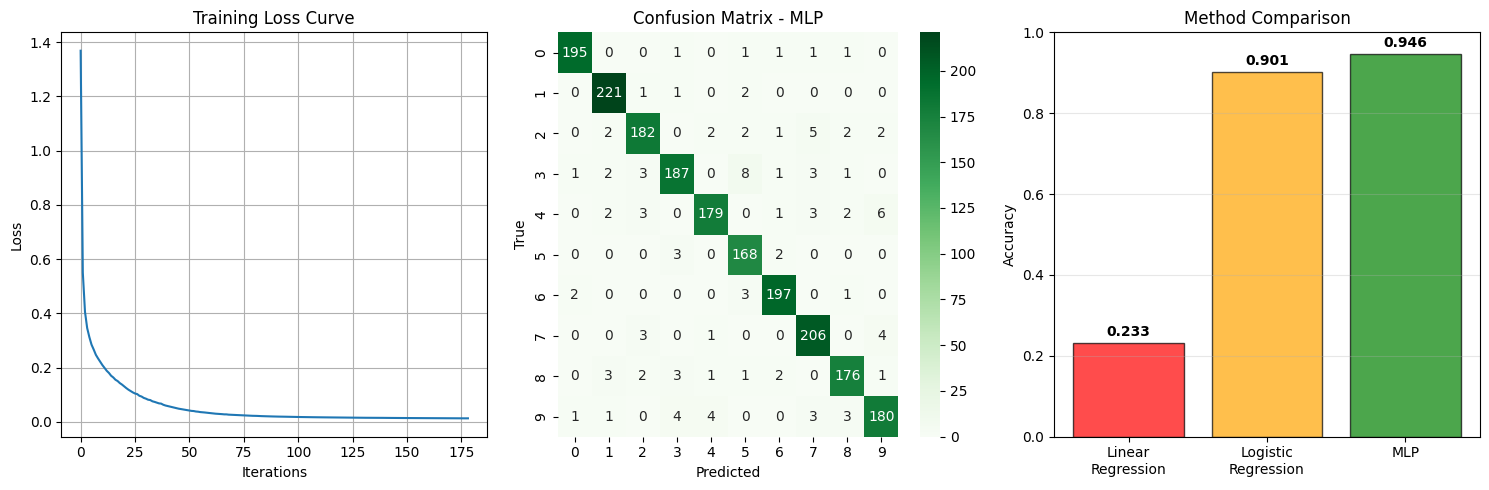


MLP Advantages:
- Non-linear decision boundaries
- Hidden layers capture complex patterns
- Better accuracy: 94.5%
- Foundation for deep learning

MLP Limitations:
- Still treats pixels independently
- Doesn't understand spatial relationships
- Many parameters to tune
- Can overfit without proper regularization


In [7]:
# Multi-Layer Perceptron (MLP) with Scikit-learn
print("Training Multi-Layer Perceptron...")
start_time = time.time()

# Create MLP with one hidden layer
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),  # One hidden layer with 50 neurons
    activation='relu',          # ReLU activation function
    solver='adam',              # Adam optimizer
    max_iter=300,               # Maximum iterations
    random_state=42,
    alpha=0.01                  # L2 regularization
)

mlp.fit(X_train_normalized, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test_normalized)
y_pred_proba_mlp = mlp.predict_proba(X_test_normalized)

MLP_training_time = time.time() - start_time

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Training time: {MLP_training_time:.2f} seconds")
print(f"Accuracy: {accuracy_mlp:.3f} ({accuracy_mlp*100:.1f}%)")
print(f"Number of layers: {mlp.n_layers_}")
print(f"Hidden layer sizes: {mlp.hidden_layer_sizes[0]}")
print(f"Number of iterations: {mlp.n_iter_}")

# Calculate total number of parameters (weights + biases)
total_params = sum(coef.size for coef in mlp.coefs_) + sum(intercept.size for intercept in mlp.intercepts_)
print(f"Total number of parameters: {total_params}")

# Show some example predictions
print("\nMLP Example predictions:")
print("True | Pred | Confidence | Status")
print("-" * 35)
for i in range(5):
    true_label = y_test[i]
    pred_label = y_pred_mlp[i]
    confidence = np.max(y_pred_proba_mlp[i])
    status = "✓" if true_label == pred_label else "✗"
    
    print(f"{true_label:^4} | {pred_label:^4} | {confidence:^10.3f} | {status}")

# Visualize results
plt.figure(figsize=(15, 5))

# Loss curve
plt.subplot(1, 3, 1)
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

# Confusion Matrix
plt.subplot(1, 3, 2)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('True')

# Compare accuracies so far
plt.subplot(1, 3, 3)
methods = ['Linear\nRegression', 'Logistic\nRegression', 'MLP']
accuracies = [accuracy_linear, accuracy_logistic, accuracy_mlp]
colors = ['red', 'orange', 'green']

bars = plt.bar(methods, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.title('Method Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add accuracy labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMLP Advantages:")
print(f"- Non-linear decision boundaries")
print(f"- Hidden layers capture complex patterns")
print(f"- Better accuracy: {accuracy_mlp:.1%}")
print(f"- Foundation for deep learning")
print(f"\nMLP Limitations:")
print(f"- Still treats pixels independently")
print(f"- Doesn't understand spatial relationships")
print(f"- Many parameters to tune")
print(f"- Can overfit without proper regularization")

## 8. Method 4: K-Nearest Neighbors (KNN)

**What is KNN?**

K-Nearest Neighbors is one of the simplest machine learning algorithms. It classifies a new data point by finding the K closest training examples in the feature space and assigning the most common class among these neighbors.

**How KNN Works:**

1. Store all training data (no explicit training phase!)
2. For a new sample, calculate distance to all training samples
3. Find the K nearest neighbors
4. Take majority vote from these K neighbors
5. Assign the predicted class

**Key Parameters:**

- **K**: Number of nearest neighbors to consider
- **Distance Metric**: Usually Euclidean distance for images

Let's implement KNN and see how different values of K affect performance!


In [8]:
print("Implementing K-Nearest Neighbors (KNN)...")
print()

# We'll use a smaller subset for KNN since it can be computationally expensive
# Let's use 5000 samples for training and 1000 for testing
knn_train_size = 5000
knn_test_size = 1000

# Sample data for KNN demonstration
knn_X_train = X_train[:knn_train_size]
knn_y_train = y_train[:knn_train_size]
knn_X_test = X_test[:knn_test_size]
knn_y_test = y_test[:knn_test_size]

print(f"Using {knn_train_size} training samples and {knn_test_size} test samples")
print(f"Training data shape: {knn_X_train.shape}")
print(f"Test data shape: {knn_X_test.shape}")
print()

# Test different values of K
k_values = [1, 3, 5, 7, 10, 15, 20]
knn_results = {}

for k in k_values:
    # print(f"Training KNN with K={k}...")
    start_time = time.time()
    
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(knn_X_train, knn_y_train)
    
    # Make predictions
    knn_pred = knn.predict(knn_X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(knn_y_test, knn_pred)
    training_time = time.time() - start_time
    
    # Store results
    knn_results[k] = {
        'accuracy': accuracy,
        'time': training_time,
        'model': knn,
        'predictions': knn_pred
    }
    
    # print(f"  K={k}: Accuracy = {accuracy:.4f}, Time = {training_time:.2f}s")



Implementing K-Nearest Neighbors (KNN)...

Using 5000 training samples and 1000 test samples
Training data shape: (5000, 784)
Test data shape: (1000, 784)



In [9]:
print("KNN Results Summary:")
print("=" * 50)
for k, results in knn_results.items():
    print(f"K={k:2d}: {results['accuracy']:.4f} accuracy ({results['time']:.2f}s)")

KNN Results Summary:
K= 1: 0.9350 accuracy (0.15s)
K= 3: 0.9290 accuracy (0.15s)
K= 5: 0.9290 accuracy (0.17s)
K= 7: 0.9190 accuracy (0.18s)
K=10: 0.9120 accuracy (0.19s)
K=15: 0.9060 accuracy (0.22s)
K=20: 0.8990 accuracy (0.23s)


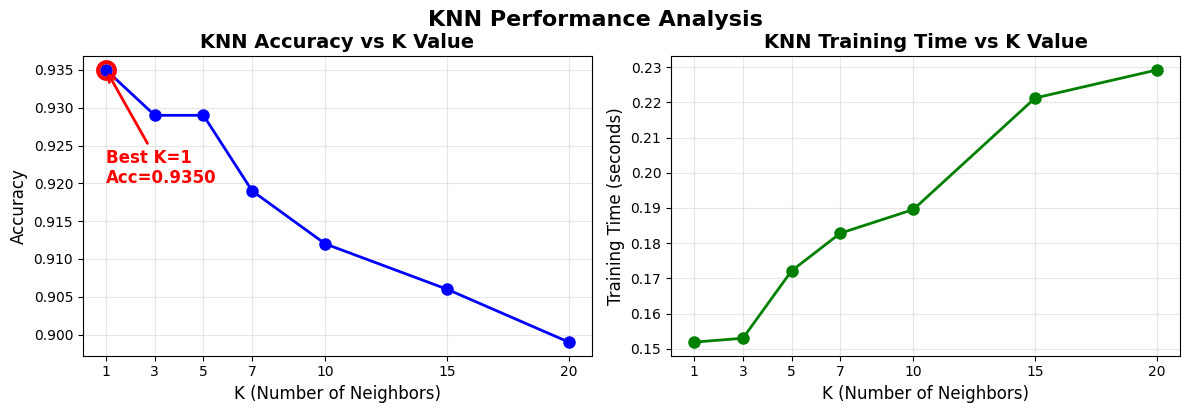

Best performing K: 1 with accuracy: 0.9350
Detailed Classification Report for K=1:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       103
           1       0.91      0.98      0.95       116
           2       0.97      0.89      0.93        98
           3       0.95      0.90      0.93        92
           4       0.92      0.87      0.90        99
           5       0.94      0.92      0.93        87
           6       0.93      0.99      0.96       108
           7       0.96      0.95      0.96       110
           8       0.97      0.90      0.93        92
           9       0.84      0.92      0.88        95

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.94      0.93      1000



In [12]:
# Visualize KNN performance vs K value
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Accuracy vs K
k_vals = list(knn_results.keys())
accuracies = [knn_results[k]['accuracy'] for k in k_vals]
times = [knn_results[k]['time'] for k in k_vals]

ax1.plot(k_vals, accuracies, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('K (Number of Neighbors)', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('KNN Accuracy vs K Value', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_vals)

# Highlight best K
best_k = max(knn_results.keys(), key=lambda k: knn_results[k]['accuracy'])
best_accuracy = knn_results[best_k]['accuracy']
ax1.plot(best_k, best_accuracy, 'ro', markersize=12, markerfacecolor='none', markeredgewidth=3)
ax1.annotate(f'Best K={best_k}\nAcc={best_accuracy:.4f}', 
            xy=(best_k, best_accuracy), xytext=(best_k, best_accuracy-0.015),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, fontweight='bold', color='red')

# Plot 2: Training Time vs K
ax2.plot(k_vals, times, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('K (Number of Neighbors)', fontsize=12)
ax2.set_ylabel('Training Time (seconds)', fontsize=12)
ax2.set_title('KNN Training Time vs K Value', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_vals)

plt.tight_layout()
plt.suptitle('KNN Performance Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print(f"Best performing K: {best_k} with accuracy: {best_accuracy:.4f}")

# Show detailed results for best K
best_knn = knn_results[best_k]['model']
best_pred = knn_results[best_k]['predictions']

print(f"Detailed Classification Report for K={best_k}:")
print("=" * 60)
print(classification_report(knn_y_test, best_pred))

KNN Decision Process Demonstration


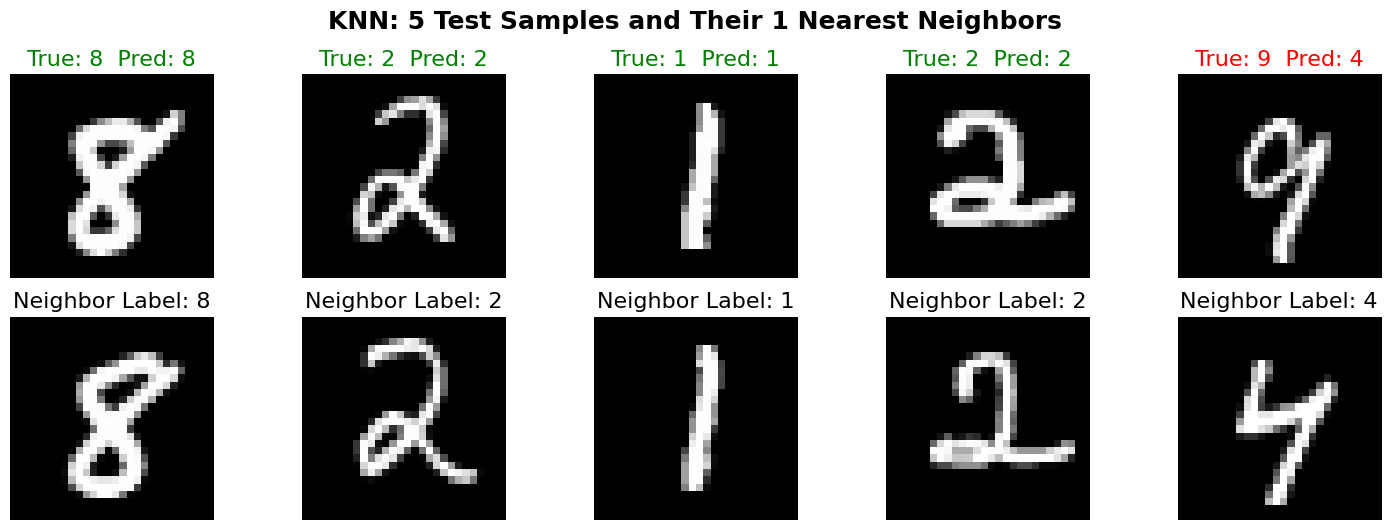

In [13]:
# Demonstrate how KNN works: Show nearest neighbors for a specific test sample
print("KNN Decision Process Demonstration")
print("=" * 60)

num_samples = 5  # Number of test samples to visualize
fig, axes = plt.subplots(best_k + 1, num_samples, figsize=(3 * num_samples, 2.5 * (best_k + 1)))

for idx in range(num_samples):
    sample = knn_X_test[idx:idx+1]
    label = knn_y_test[idx]
    pred = best_knn.predict(sample)[0]
    distances, neighbor_indices = best_knn.kneighbors(sample, n_neighbors=best_k)
    neighbor_labels = knn_y_train[neighbor_indices[0]]
    neighbor_images = knn_X_train[neighbor_indices[0]]

    # Show test sample
    axes[0,idx].imshow(sample.reshape(28, 28), cmap='gray')
    axes[0,idx].set_title(f"True: {label}  Pred: {pred}", color='green' if pred == label else 'red', fontsize=16)
    axes[0,idx].axis('off')

    # Show neighbors
    for n in range(best_k):
        axes[n + 1, idx].imshow(neighbor_images[n].reshape(28, 28), cmap='gray')
        axes[n + 1, idx].set_title(f"Neighbor Label: {neighbor_labels[n]}", fontsize=16)
        axes[n + 1, idx].axis('off')

plt.tight_layout()
plt.suptitle(f'KNN: {num_samples} Test Samples and Their {best_k} Nearest Neighbors', fontsize=18, y=1.05, fontweight='bold')
plt.show()

test sample 4 with true label: 9


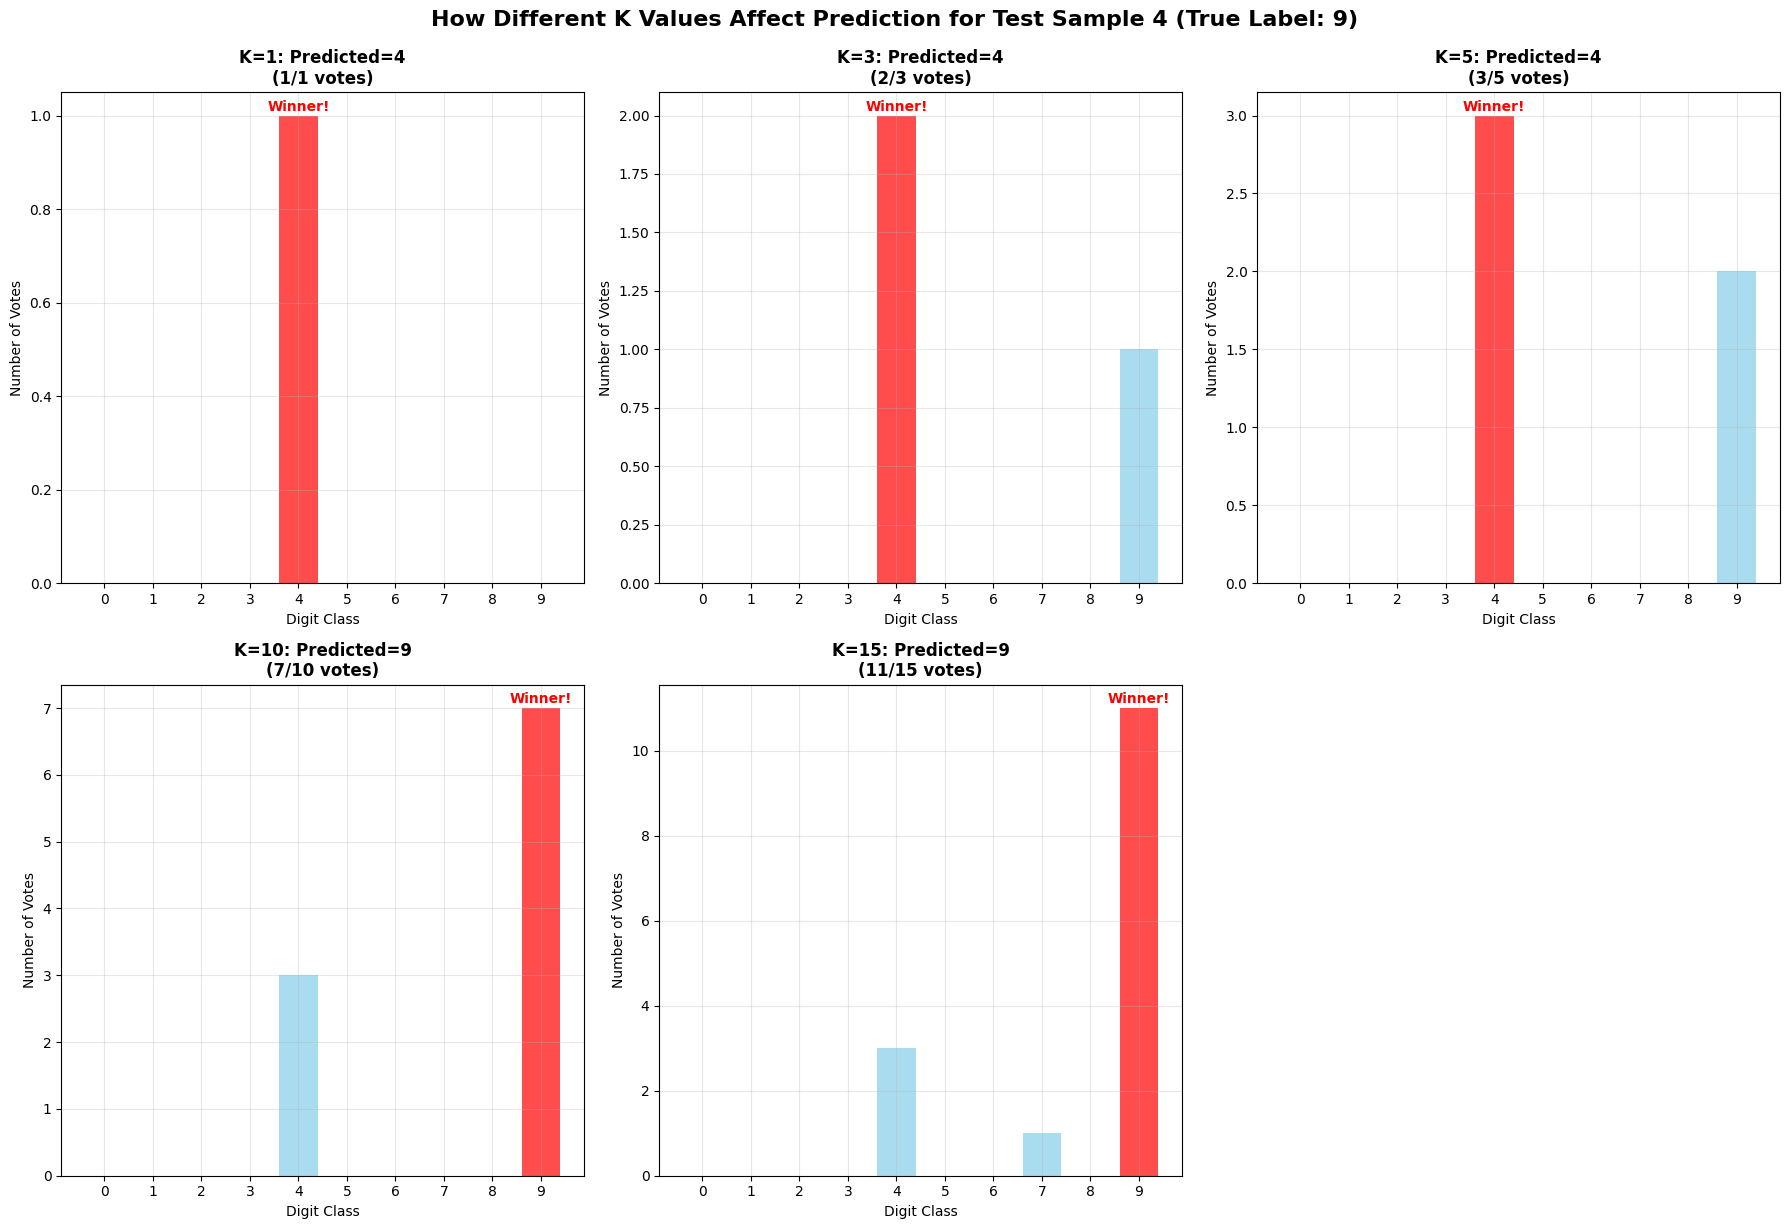

Comparison Results for Test Sample 4 (True label: 9):
----------------------------------------------------------------------
K= 1: Prediction=4 ✗ | Votes: {4: 1}
K= 3: Prediction=4 ✗ | Votes: {4: 2, 9: 1}
K= 5: Prediction=4 ✗ | Votes: {4: 3, 9: 2}
K=10: Prediction=9 ✓ | Votes: {4: 3, 9: 7}
K=15: Prediction=9 ✓ | Votes: {4: 3, 9: 11, 7: 1}
Key Observations:
• Smaller K (like K=1): More sensitive to noise, can overfit
• Larger K (like K=15): Smoother decision boundary, may underfit
• Best K for this dataset: 1 (based on overall accuracy)
• True label: 9
• This sample: 2/5 K values gave correct prediction


In [19]:
# Select a test sample to analyze
test_idx = 4  # You can change this to any index you want
test_sample = knn_X_test[test_idx:test_idx+1]
true_label = knn_y_test[test_idx]

print(f"test sample {test_idx} with true label: {true_label}")

# Test with the same sample but different K values
comparison_ks = [1, 3, 5, 10, 15]
results_comparison = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, k in enumerate(comparison_ks):
    if idx < 6:  # We have 6 subplot positions
        # Create KNN with specific K
        knn_k = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_k.fit(knn_X_train, knn_y_train)
        
        # Find neighbors and make prediction
        distances, neighbor_indices = knn_k.kneighbors(test_sample, n_neighbors=k)
        neighbor_labels = knn_y_train[neighbor_indices[0]]
        prediction = knn_k.predict(test_sample)[0]
        
        # Count votes
        neighbor_votes = Counter(neighbor_labels)
        
        # Store results
        results_comparison.append({
            'k': k,
            'prediction': prediction,
            'votes': neighbor_votes,
            'neighbor_labels': neighbor_labels
        })
        
        # Create visualization for this K
        # Show distribution of neighbor labels
        labels = list(range(10))
        vote_counts = [neighbor_votes.get(label, 0) for label in labels]
        
        bars = axes[idx].bar(labels, vote_counts, alpha=0.7, 
                            color=['red' if label == prediction else 'skyblue' for label in labels])
        axes[idx].set_title(f'K={k}: Predicted={prediction}\n({vote_counts[prediction]}/{k} votes)', 
                            fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Digit Class')
        axes[idx].set_ylabel('Number of Votes')
        axes[idx].set_xticks(labels)
        axes[idx].grid(True, alpha=0.3)
        
        # Highlight the prediction
        if vote_counts[prediction] > 0:
            axes[idx].annotate(f'Winner!', 
                                xy=(prediction, vote_counts[prediction]), 
                                xytext=(prediction, vote_counts[prediction] * 1.01),
                                # arrowprops=dict(arrowstyle='->', color='red', lw=2),
                                fontsize=10, fontweight='bold', color='red', ha='center')

# Hide the last subplot if we don't need it
if len(comparison_ks) < 6:
    axes[5].axis('off')

plt.tight_layout()
plt.suptitle(f'How Different K Values Affect Prediction for Test Sample {test_idx} (True Label: {true_label})', 
            fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Print comparison results
print(f"Comparison Results for Test Sample {test_idx} (True label: {true_label}):")
print("-" * 70)
for result in results_comparison:
    k = result['k']
    pred = result['prediction']
    votes = result['votes']
    accuracy_mark = '✓' if pred == true_label else '✗'
    print(f"K={k:2d}: Prediction={pred} {accuracy_mark} | Votes: {dict(votes)}")

print(f"Key Observations:")
print(f"• Smaller K (like K=1): More sensitive to noise, can overfit")
print(f"• Larger K (like K=15): Smoother decision boundary, may underfit") 
print(f"• Best K for this dataset: {best_k} (based on overall accuracy)")
print(f"• True label: {true_label}")

# Show the effect of K on overall performance
correct_predictions = sum(1 for result in results_comparison if result['prediction'] == true_label)
print(f"• This sample: {correct_predictions}/{len(comparison_ks)} K values gave correct prediction")

Enhanced KNN Visualization with Colorful Class Indicators
Analyzing Test Sample 42 (True Label: 7)
--------------------------------------------------


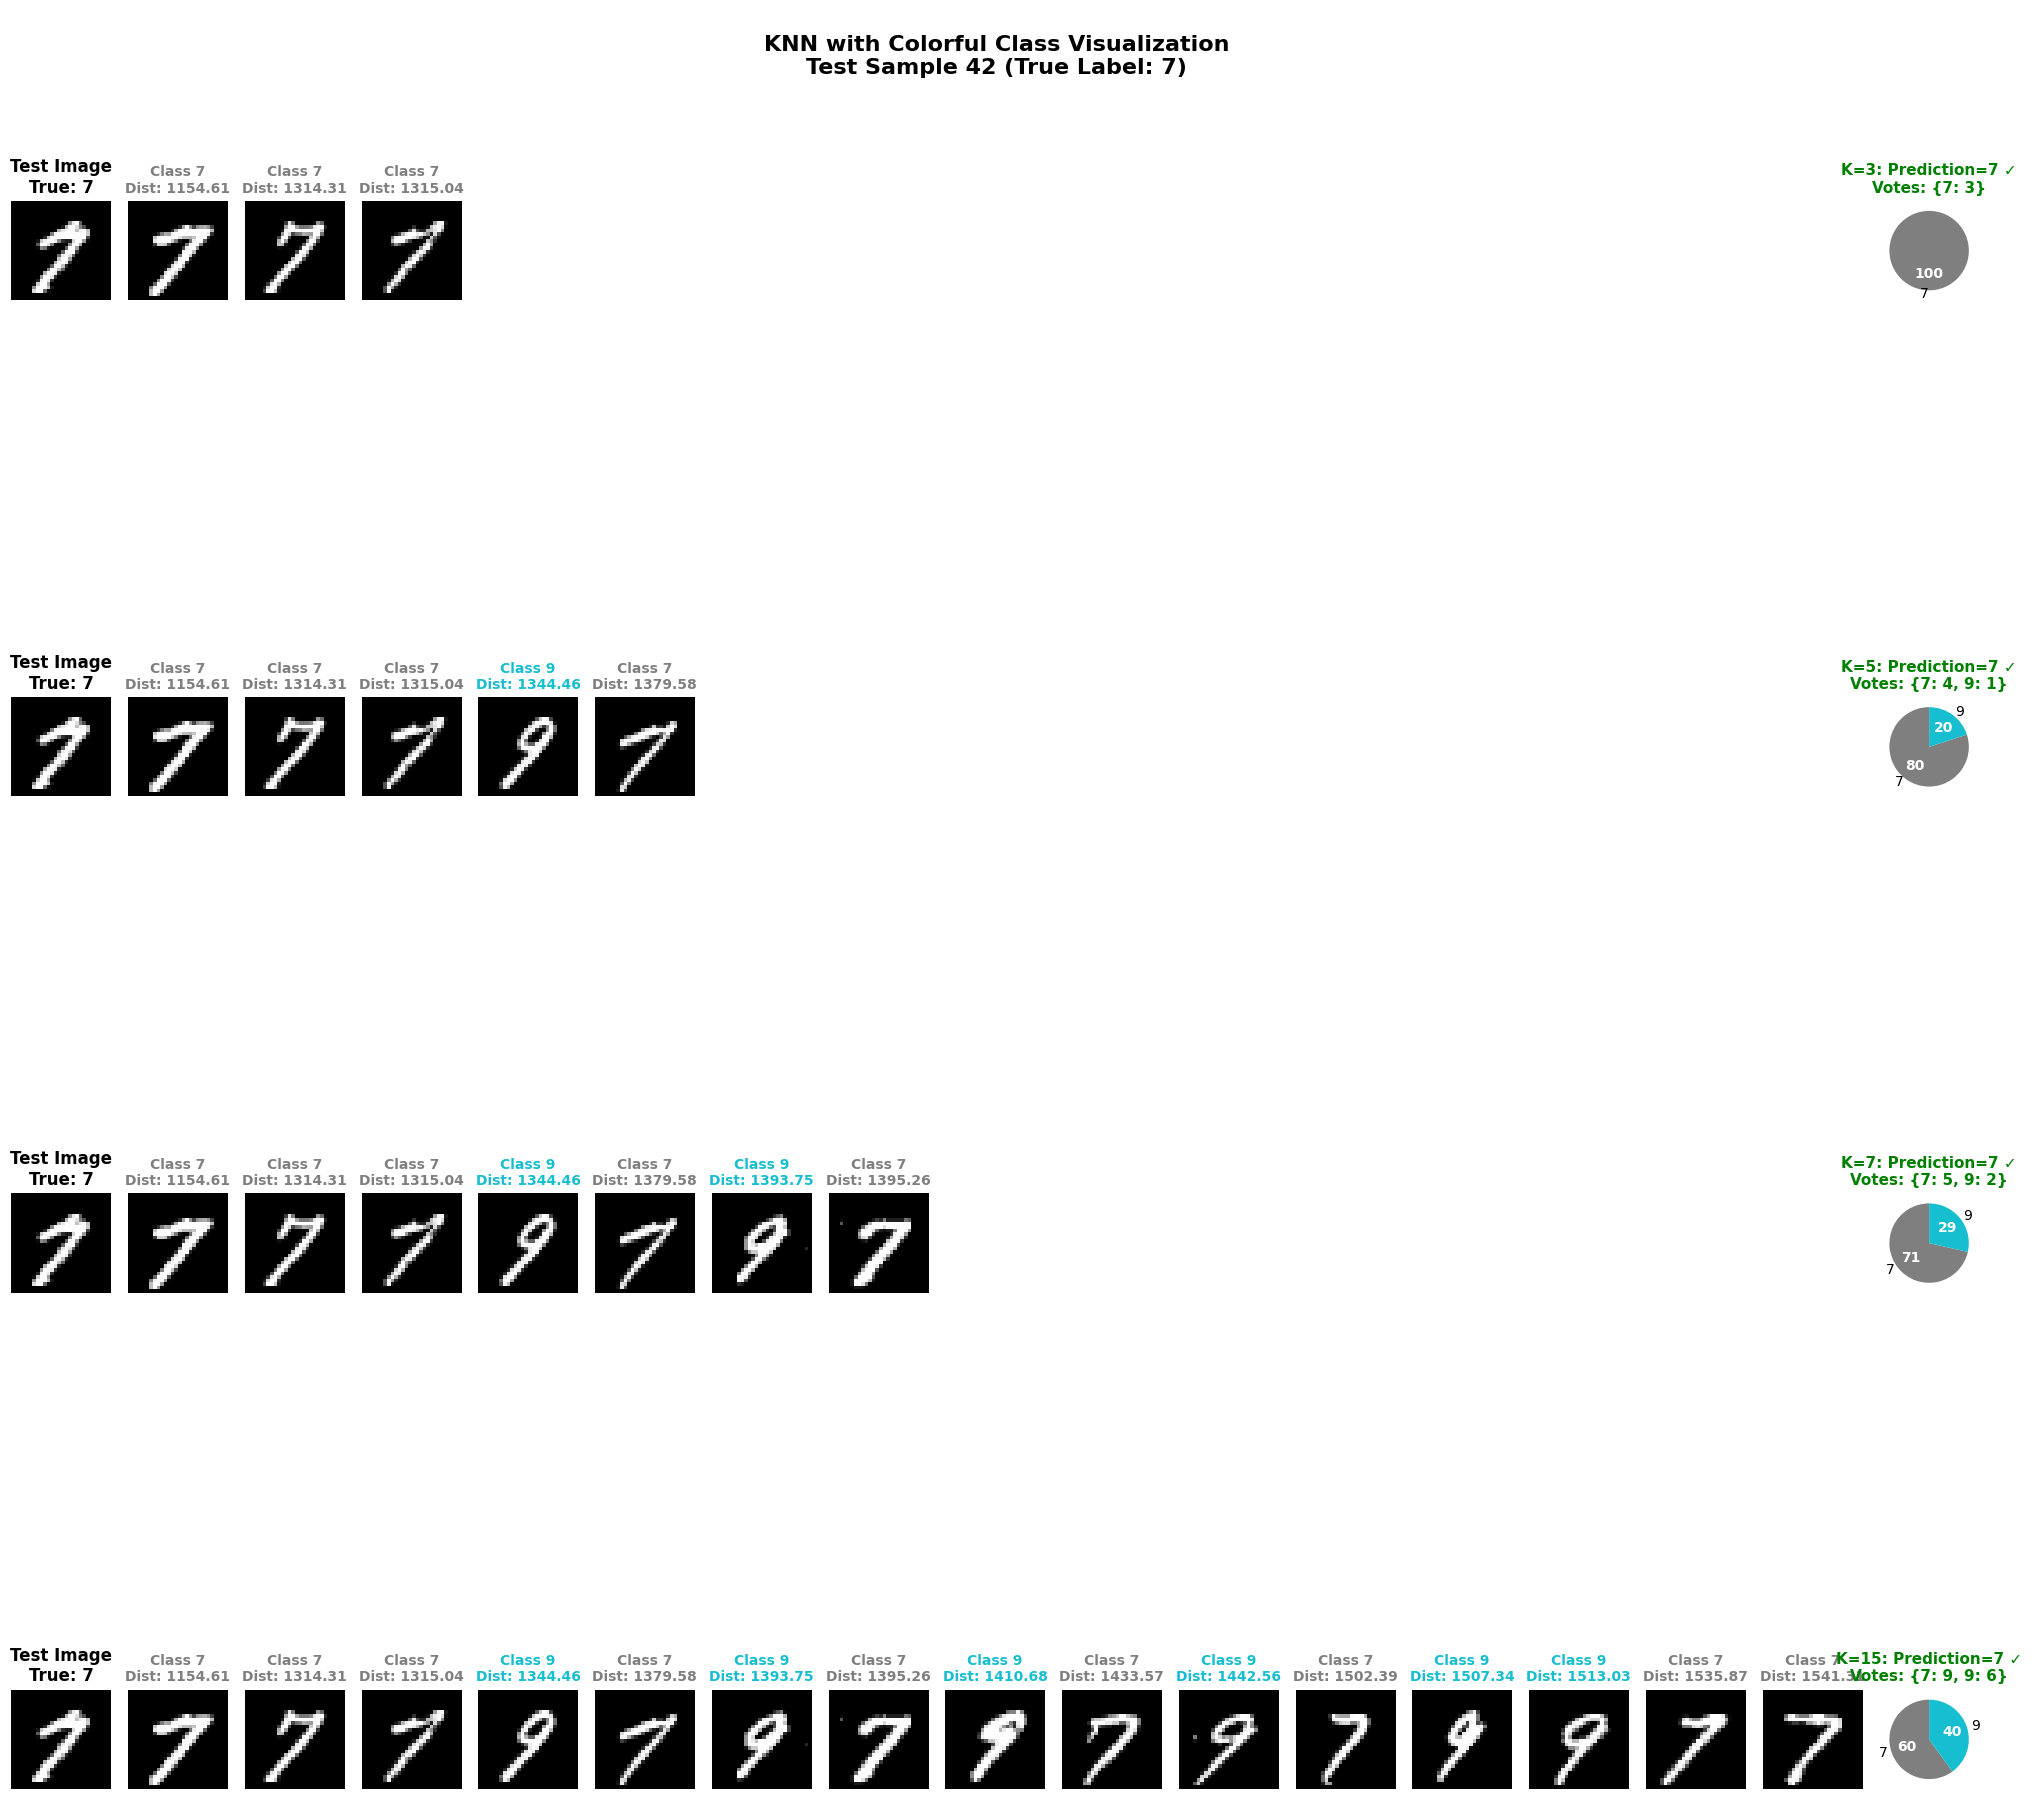

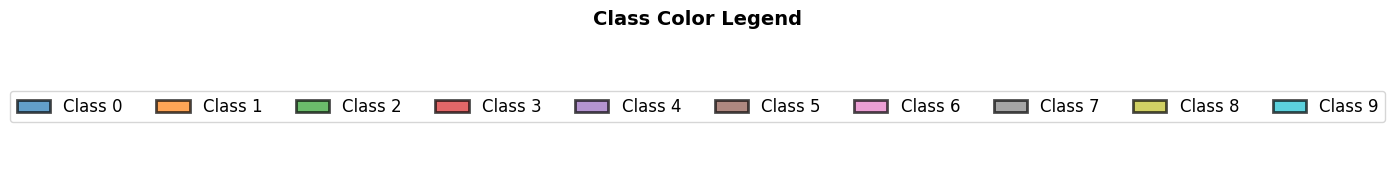


Key Insights:
• Each neighbor is color-coded by its class label
• Borders show the class colors clearly
• Background transparency helps see the digit while showing class
• Pie charts show the vote distribution for each K value
• Different K values can lead to different class distributions
• True label: 7, check if predictions match!


In [20]:
# Enhanced KNN Visualization with Colorful Class Areas
print("Enhanced KNN Visualization with Colorful Class Indicators")
print("=" * 60)

# Define colors for each digit class (0-9)
class_colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Select a test sample to analyze
test_idx = 42
test_sample = knn_X_test[test_idx:test_idx+1] 
true_label = knn_y_test[test_idx]

print(f"Analyzing Test Sample {test_idx} (True Label: {true_label})")
print("-" * 50)

# Test different K values with colorful visualization
k_values = [3, 5, 7, 15]
fig, axes = plt.subplots(len(k_values), max(k_values) + 2, figsize=(20, 5 * len(k_values)))

for k_idx, k in enumerate(k_values):
    # Create KNN with specific K
    knn_k = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_k.fit(knn_X_train, knn_y_train)
    
    # Get neighbors and prediction
    distances, neighbor_indices = knn_k.kneighbors(test_sample, n_neighbors=k)
    neighbor_labels = knn_y_train[neighbor_indices[0]]
    neighbor_images = knn_X_train[neighbor_indices[0]]
    prediction = knn_k.predict(test_sample)[0]
    
    # Count votes for each class
    votes = Counter(neighbor_labels)
    
    # Show the test image
    axes[k_idx, 0].imshow(test_sample.reshape(28, 28), cmap='gray')
    axes[k_idx, 0].set_title(f'Test Image\nTrue: {true_label}', fontsize=12, fontweight='bold')
    axes[k_idx, 0].axis('off')
    
    # Add colorful border based on true class
    for spine in axes[k_idx, 0].spines.values():
        spine.set_edgecolor(class_colors[true_label])
        spine.set_linewidth(4)
        spine.set_visible(True)
    
    # Show neighbors with colorful backgrounds
    for n in range(k):
        neighbor_label = neighbor_labels[n]
        
        # Create subplot for neighbor
        ax = axes[k_idx, n + 1]
        ax.imshow(neighbor_images[n].reshape(28, 28), cmap='gray')
        
        # Add colorful border based on neighbor's class
        for spine in ax.spines.values():
            spine.set_edgecolor(class_colors[neighbor_label])
            spine.set_linewidth(4)
            spine.set_visible(True)
        
        # Set background color with transparency
        ax.patch.set_facecolor(class_colors[neighbor_label])
        ax.patch.set_alpha(0.3)
        
        # Title showing class and distance
        distance = distances[0][n]
        ax.set_title(f'Class {neighbor_label}\nDist: {distance:.2f}', 
                    fontsize=10, fontweight='bold',
                    color=class_colors[neighbor_label])
        ax.axis('off')
    
    # Hide unused neighbor positions
    for n in range(k, max(k_values)):
        axes[k_idx, n + 1].axis('off')
    
    # Show prediction result with vote breakdown
    ax_result = axes[k_idx, max(k_values) + 1]
    
    # Create a pie chart showing votes
    vote_labels = list(votes.keys())
    vote_counts = list(votes.values())
    vote_colors = [class_colors[label] for label in vote_labels]
    
    wedges, texts, autotexts = ax_result.pie(vote_counts, labels=vote_labels, colors=vote_colors,
                                            autopct='%1.0f', startangle=90, textprops={'fontsize': 10})
    
    # Highlight the winning class
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    accuracy_symbol = '✓' if prediction == true_label else '✗'
    ax_result.set_title(f'K={k}: Prediction={prediction} {accuracy_symbol}\nVotes: {dict(votes)}', 
                        fontsize=11, fontweight='bold',
                        color='green' if prediction == true_label else 'red')

plt.tight_layout()
plt.suptitle(f'KNN with Colorful Class Visualization\nTest Sample {test_idx} (True Label: {true_label})', 
            fontsize=16, fontweight='bold', y=0.98)

# Create a legend showing class colors
legend_fig, legend_ax = plt.subplots(1, 1, figsize=(12, 2))
legend_patches = [plt.Rectangle((0, 0), 1, 1, facecolor=class_colors[i], 
                                edgecolor='black', linewidth=2, alpha=0.7) 
                for i in range(10)]
legend_ax.legend(legend_patches, [f'Class {i}' for i in range(10)], 
                loc='center', ncol=10, fontsize=12)
legend_ax.set_title('Class Color Legend', fontsize=14, fontweight='bold')
legend_ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
print(f"• Each neighbor is color-coded by its class label")
print(f"• Borders show the class colors clearly")
print(f"• Background transparency helps see the digit while showing class")
print(f"• Pie charts show the vote distribution for each K value")
print(f"• Different K values can lead to different class distributions")
print(f"• True label: {true_label}, check if predictions match!")

2D KNN Decision Boundary Visualization
Reduced 784 features to 2D using PCA
Explained variance ratio: 0.110


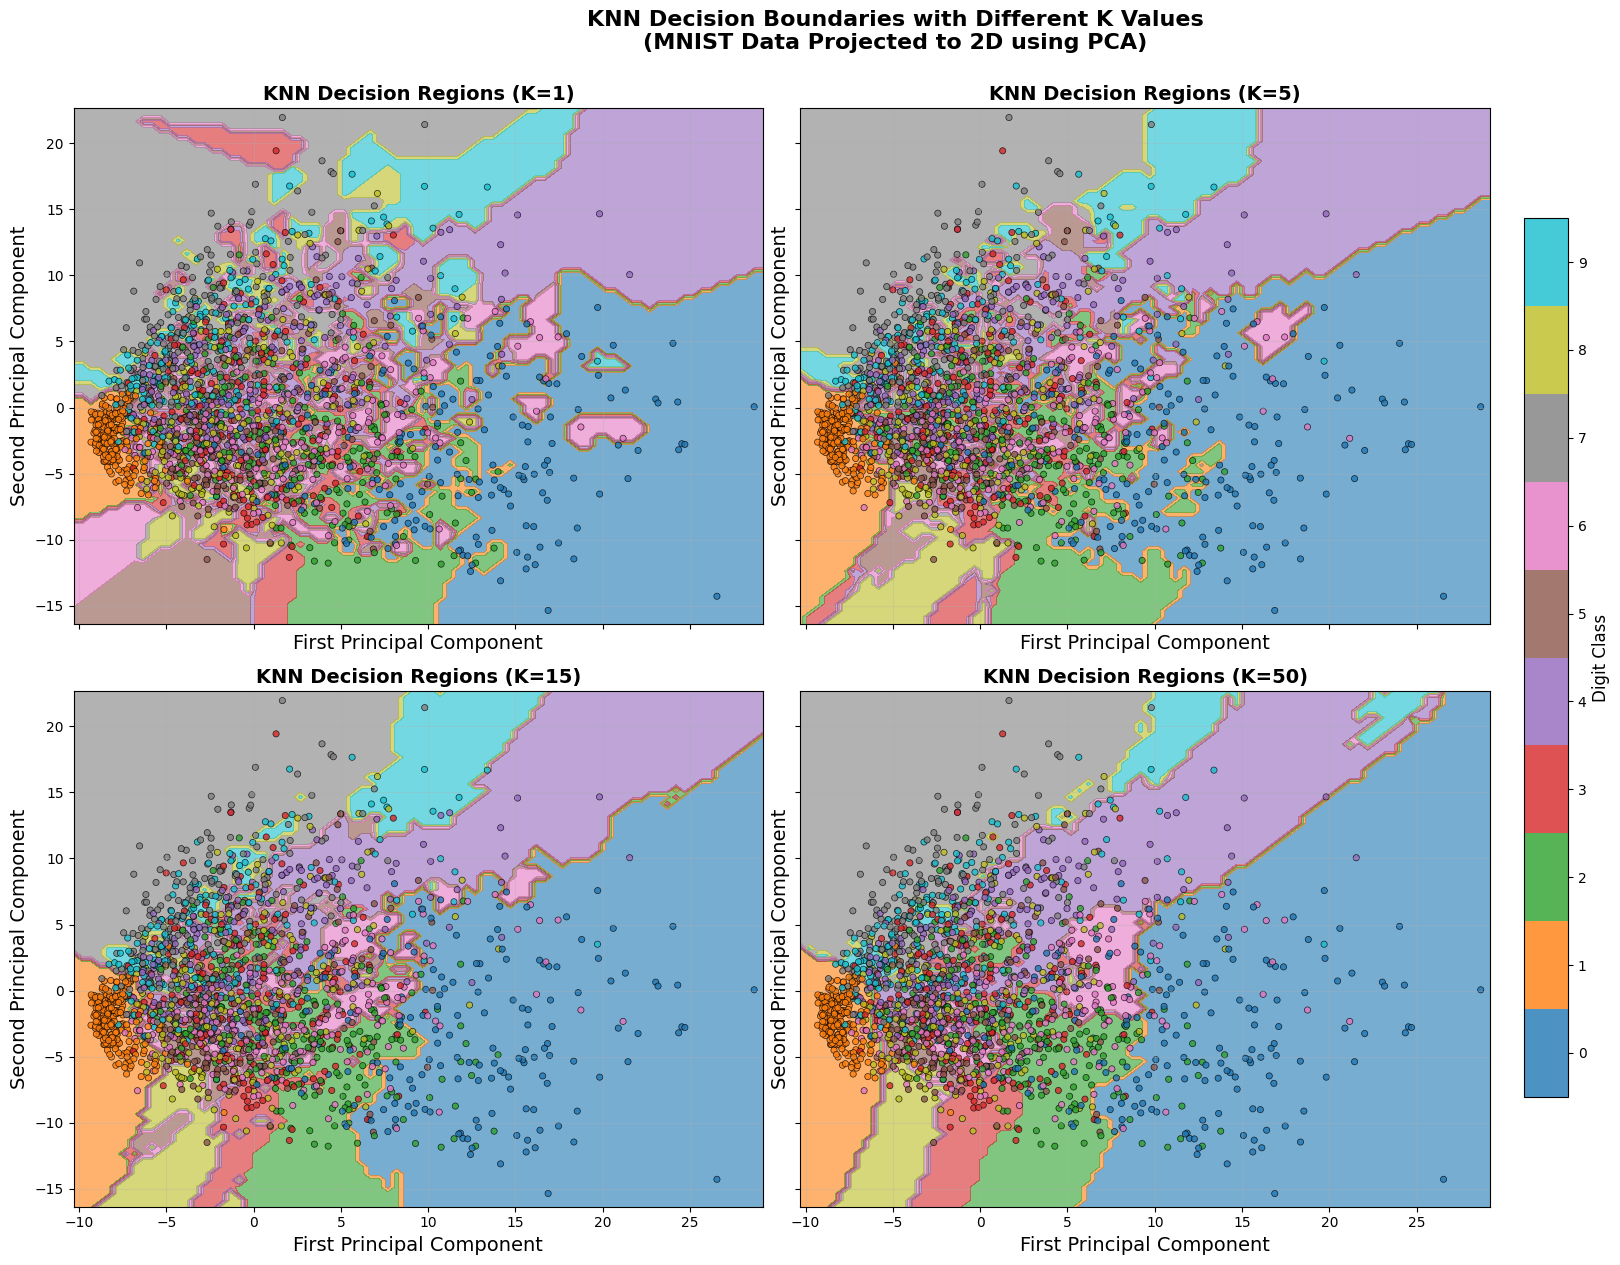

Observations about Decision Boundaries:
• K=1: Very complex, jagged boundaries (high variance, low bias)
• K=5: Smoother boundaries while capturing local patterns
• K=15: Even smoother, more generalized regions
• K=50: Very smooth, simple boundaries (low variance, high bias)
• Colored regions show where each class would be predicted
• Data points show actual class labels with matching colors


In [21]:
# 2D Decision Boundary Visualization with Colorful Regions
print("2D KNN Decision Boundary Visualization")
print("=" * 50)

# For visualization, we'll use PCA to reduce MNIST to 2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Use a subset of data for computational efficiency
n_samples = 2000
subset_indices = np.random.choice(len(knn_X_train), n_samples, replace=False)
X_subset = knn_X_train[subset_indices]
y_subset = knn_y_train[subset_indices]

# Standardize and reduce to 2D using PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

print(f"Reduced {X_subset.shape[1]} features to 2D using PCA")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.3f}")

# Create KNN models with different K values
k_values_2d = [1, 5, 15, 50]
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for idx, k in enumerate(k_values_2d):
    # Train KNN on 2D data
    knn_2d = KNeighborsClassifier(n_neighbors=k)
    knn_2d.fit(X_2d, y_subset)
    
    # Create a mesh for decision boundary
    h = 0.5  # step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Predict on mesh points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn_2d.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    axes[idx].contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.tab10, levels=np.arange(-0.5, 10.5, 1))
    
    # Plot the data points
    scatter = axes[idx].scatter(X_2d[:, 0], X_2d[:, 1], c=y_subset, 
                                cmap=plt.cm.tab10, s=20, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    axes[idx].set_title(f'KNN Decision Regions (K={k})', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('First Principal Component', fontsize=14)
    axes[idx].set_ylabel('Second Principal Component', fontsize=14)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('KNN Decision Boundaries with Different K Values\n(MNIST Data Projected to 2D using PCA)', 
            fontsize=16, fontweight='bold', y=1.05)

# Add a colorbar
bounds = np.arange(-0.5, 10.5, 1)
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=10, clip=True)
cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', pad=0.02, shrink=0.8, norm=norm, boundaries=bounds, ticks=np.arange(0, 10))
cbar.set_label('Digit Class', fontsize=12)
cbar.set_ticks(np.arange(0, 10))
cbar.set_ticklabels(np.arange(0, 10))

plt.show()

print(f"Observations about Decision Boundaries:")
print(f"• K=1: Very complex, jagged boundaries (high variance, low bias)")
print(f"• K=5: Smoother boundaries while capturing local patterns")
print(f"• K=15: Even smoother, more generalized regions")
print(f"• K=50: Very smooth, simple boundaries (low variance, high bias)")
print(f"• Colored regions show where each class would be predicted")
print(f"• Data points show actual class labels with matching colors")

### KNN Analysis: Strengths and Weaknesses

**✅ Strengths of KNN:**

- **Simple and Intuitive**: Easy to understand and implement
- **No Training Phase**: Just stores the data (lazy learning)
- **Non-parametric**: Makes no assumptions about data distribution
- **Effective for Small Datasets**: Can work well with limited data
- **Local Decision Making**: Can capture complex local patterns

**❌ Weaknesses of KNN:**

- **Computationally Expensive**: Must calculate distance to all training points
- **Memory Intensive**: Stores entire training dataset
- **Sensitive to Irrelevant Features**: All features contribute equally to distance
- **Curse of Dimensionality**: Performance degrades in high-dimensional spaces
- **Sensitive to Scale**: Features must be normalized

**🔍 KNN vs Other Methods We've Seen:**

| Method              | Training Speed | Prediction Speed | Memory Usage | Accuracy (MNIST) |
| ------------------- | -------------- | ---------------- | ------------ | ---------------- |
| Linear Regression   | Fast           | Very Fast        | Low          | ~85%             |
| Logistic Regression | Fast           | Very Fast        | Low          | ~92%             |
| MLP                 | Medium         | Fast             | Medium       | ~97%             |
| **KNN**             | **Instant**    | **Slow**         | **High**     | **~94%**         |

**Key Insights:**

- KNN performs surprisingly well (94%) without any explicit training!
- Trade-off: No training time but slow predictions
- Good baseline method for comparison
- In practice, used more for recommendation systems than image classification


## 9. Method 5: Simple Neural Network with PyTorch

**Why PyTorch?**

- Industry-standard deep learning framework
- More control over network architecture
- Better understanding of what's happening "under the hood"
- Foundation for advanced deep learning

**What we'll build**:

- Simple feedforward neural network
- Multiple hidden layers
- Custom training loop
- Batch processing
- Modern optimization techniques

This bridges classical ML and deep learning!


In [22]:
# Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, num_classes=10):
        super(SimpleNN, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Second hidden layer
        self.fc3 = nn.Linear(hidden_size, num_classes) # Output layer
        
        # Activation function
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # Regularization
        
    def forward(self, x):
        # Forward pass through the network
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # No activation on output (handled by loss)
        return x

# Prepare data for PyTorch
X_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.LongTensor(y_test)

# Create data loaders for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Neural Network Architecture:")
print(f"Input size: 784 (28×28 pixels)")
print(f"Hidden layers: 2 layers with 128 neurons each")
print(f"Output size: 10 (digit classes)")
print(f"Activation: ReLU")
print(f"Regularization: Dropout (20%)")
print(f"Batch size: {batch_size}")
print(f"Training batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

Neural Network Architecture:
Input size: 784 (28×28 pixels)
Hidden layers: 2 layers with 128 neurons each
Output size: 10 (digit classes)
Activation: ReLU
Regularization: Dropout (20%)
Batch size: 64
Training batches: 125
Test batches: 32


In [23]:
# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # Good for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

print("Training PyTorch Neural Network...")
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params
print(f"Total parameters: {total_params:,} (Trainable: {trainable_params:,}, Non-trainable: {non_trainable_params:,})")

# Training loop
num_epochs = 20
train_losses = []
train_accuracies = []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
    
    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

NN_training_time = time.time() - start_time
print(f"\nTraining completed in {NN_training_time:.2f} seconds")

# Evaluation on test set
model.eval()  # Set model to evaluation mode
test_correct = 0
test_total = 0
all_predictions = []
all_targets = []

with torch.no_grad():  # Disable gradient computation for efficiency
    for data, target in test_loader:
        output = model(data)
        _, predicted = output.max(1)
        test_total += target.size(0)
        test_correct += predicted.eq(target).sum().item()
        
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

accuracy_pytorch = 100. * test_correct / test_total
print(f'Test Accuracy: {accuracy_pytorch:.2f}%')

Training PyTorch Neural Network...
Total parameters: 118,282 (Trainable: 118,282, Non-trainable: 0)
Epoch [1/20] - Loss: 0.9504, Accuracy: 72.78%
Epoch [2/20] - Loss: 0.3698, Accuracy: 89.56%
Epoch [3/20] - Loss: 0.2847, Accuracy: 91.96%
Epoch [4/20] - Loss: 0.2283, Accuracy: 93.20%
Epoch [5/20] - Loss: 0.1928, Accuracy: 94.59%
Epoch [6/20] - Loss: 0.1586, Accuracy: 95.44%
Epoch [7/20] - Loss: 0.1406, Accuracy: 95.74%
Epoch [8/20] - Loss: 0.1178, Accuracy: 96.65%
Epoch [9/20] - Loss: 0.1064, Accuracy: 96.84%
Epoch [10/20] - Loss: 0.0952, Accuracy: 97.09%
Epoch [11/20] - Loss: 0.0818, Accuracy: 97.42%
Epoch [12/20] - Loss: 0.0726, Accuracy: 97.89%
Epoch [13/20] - Loss: 0.0659, Accuracy: 97.85%
Epoch [14/20] - Loss: 0.0599, Accuracy: 98.06%
Epoch [15/20] - Loss: 0.0543, Accuracy: 98.34%
Epoch [16/20] - Loss: 0.0456, Accuracy: 98.56%
Epoch [17/20] - Loss: 0.0366, Accuracy: 98.90%
Epoch [18/20] - Loss: 0.0387, Accuracy: 98.94%
Epoch [19/20] - Loss: 0.0351, Accuracy: 98.86%
Epoch [20/20] - 

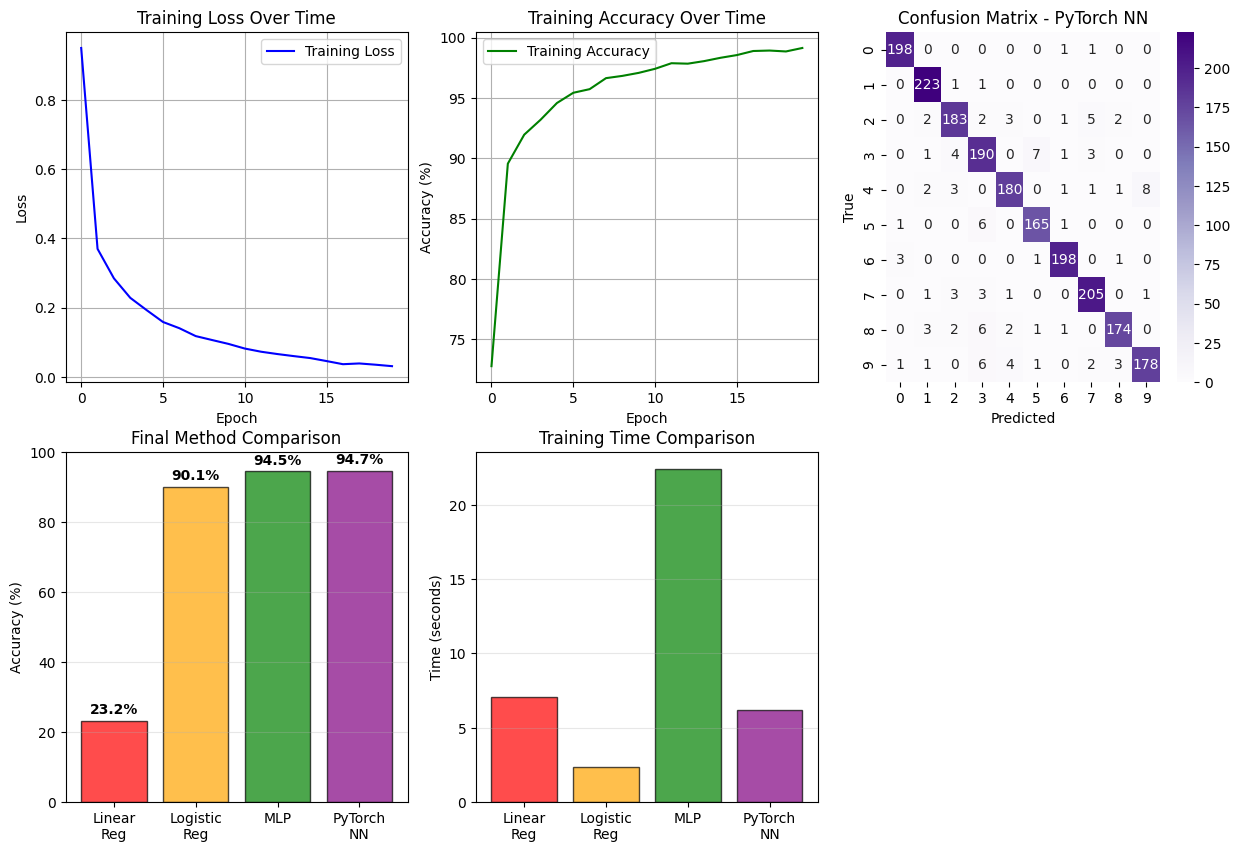

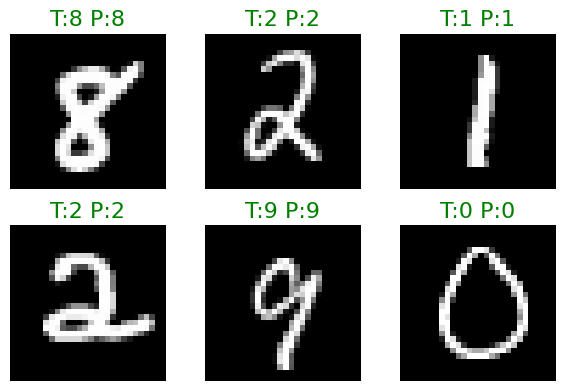


🎯 Final Results Summary:
Method               Accuracy     Key Characteristics
----------------------------------------------------------------------
Linear Regression    23.2       % Treats classes as numbers
Logistic Regression  90.1       % Proper classification, linear boundaries
MLP (Scikit-learn)   94.5       % Non-linear, hidden layers
PyTorch Neural Net   94.7       % Modern framework, flexible architecture


In [24]:
# Visualize training progress and results
plt.figure(figsize=(15, 10))

# Training curves
plt.subplot(2, 3, 1)
plt.plot(train_losses, 'b-', label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(train_accuracies, 'g-', label='Training Accuracy')
plt.title('Training Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Confusion matrix for PyTorch model
plt.subplot(2, 3, 3)
cm_pytorch = confusion_matrix(all_targets, all_predictions)
sns.heatmap(cm_pytorch, annot=True, fmt='d', cmap='Purples',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - PyTorch NN')
plt.xlabel('Predicted')
plt.ylabel('True')

# Final comparison of all methods
plt.subplot(2, 3, 4)
methods = ['Linear\nReg', 'Logistic\nReg', 'MLP', 'PyTorch\nNN']
accuracies = [accuracy_linear*100, accuracy_logistic*100, accuracy_mlp*100, accuracy_pytorch]
colors = ['red', 'orange', 'green', 'purple']

bars = plt.bar(methods, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.title('Final Method Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)

# Show some example predictions with images
plt.subplot(2, 3, 6)
plt.axis('off')  # Hide axes since images are shown separately below

# Get some test predictions
model.eval()
with torch.no_grad():
    sample_data = X_test_tensor[:6]
    sample_targets = y_test_tensor[:6]
    sample_outputs = model(sample_data)
    _, sample_predictions = sample_outputs.max(1)
# Note: The actual images and predictions are visualized in the fig_inner subplot grid below,
# not in this subplot. This subplot is intentionally left blank as a placeholder.

# Training time comparison
plt.subplot(2, 3, 5)
# Training times for all methods
times = [LR_training_time, LgR_training_time, MLP_training_time, NN_training_time]
plt.bar(methods, times, color=colors, alpha=0.7, edgecolor='black')
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
# plt.yscale('log')
plt.grid(axis='y', alpha=0.3)

# Create a small visualization
fig_inner, axes_inner = plt.subplots(2, 3, figsize=(6, 4))
for i in range(6):
    row = i // 3
    col = i % 3
    image = X_test_normalized[i].reshape(28, 28)
    axes_inner[row, col].imshow(image, cmap='gray')
    true_label = sample_targets[i].item()
    pred_label = sample_predictions[i].item()
    color = 'green' if true_label == pred_label else 'red'
    axes_inner[row, col].set_title(f'T:{true_label} P:{pred_label}', color=color, fontsize=16)
    axes_inner[row, col].axis('off')

plt.subplot(2, 3, 5)
plt.axis('off')
# plt.text(0.5, 0.5, 'See separate\nprediction examples\nabove', 
        # ha='center', va='center', fontsize=12, 
        # bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()

# Display the separate prediction examples
fig_inner.suptitle('PyTorch NN Predictions (Green=Correct, Red=Wrong)', fontsize=10)
plt.show()

print(f"\n🎯 Final Results Summary:")
print(f"{'Method':<20} {'Accuracy':<12} {'Key Characteristics'}")
print("-" * 70)
print(f"{'Linear Regression':<20} {accuracy_linear*100:<11.1f}% Treats classes as numbers")
print(f"{'Logistic Regression':<20} {accuracy_logistic*100:<11.1f}% Proper classification, linear boundaries")
print(f"{'MLP (Scikit-learn)':<20} {accuracy_mlp*100:<11.1f}% Non-linear, hidden layers")
print(f"{'PyTorch Neural Net':<20} {accuracy_pytorch:<11.1f}% Modern framework, flexible architecture")

## 10. Key Limitations of Classical ML for Images

Now that we've explored classical methods, let's understand their fundamental limitations when dealing with image data:


# Demonstrating the Limitations of Classical ML for Images

---

**Analyzing Classical ML Limitations for Images:**

---

### 1. SPATIAL RELATIONSHIPS

- Classical ML treats each pixel independently
- A '2' shifted by 1 pixel is seen as completely different
- No understanding of shapes, edges, or patterns

---

### 2. SCALE & ROTATION SENSITIVITY

- Cannot handle rotated or scaled versions
- No invariance to common transformations
- Rigid pixel-by-pixel matching

---

### 3. MANUAL FEATURE ENGINEERING

- Requires domain experts to design features
- No automatic feature learning
- Features may not generalize to new data

---

### 4. CURSE OF DIMENSIONALITY

- High dimensional input: 784 features per sample
- Training samples: {n_samples:,}
- Feature-to-sample ratio: {n_pixels/n_samples:.3f}
- Many features relative to samples
- Prone to overfitting

---

### 5. MODEL CAPACITY

- Logistic Regression parameters: {(784 + 1) \* 10:,}
- MLP parameters: ~{(784 _ 100) + 100 + (100 _ 10) + 10:,}
- PyTorch NN parameters: {sum(p.numel() for p in model.parameters()):,}
- Still limited compared to modern deep networks

---

### 6. REAL-WORLD CHALLENGES

- ❌ Background clutter
- ❌ Lighting variations
- ❌ Occlusions (partial hiding)
- ❌ Multiple objects
- ❌ Different viewpoints
- ❌ Noise and artifacts

---

## WHY WE NEED DEEP LEARNING

- ✅ Convolutional layers understand spatial relationships
- ✅ Translation invariance through convolution
- ✅ Hierarchical feature learning (edges → shapes → objects)
- ✅ Much deeper networks with more capacity
- ✅ Automatic feature extraction
- ✅ Better handling of variations and transformations


DEMONSTRATING THE SPATIAL LIMITATION:
Let's see how our trained models handle shifted versions of the same digit

Original image true label: 0


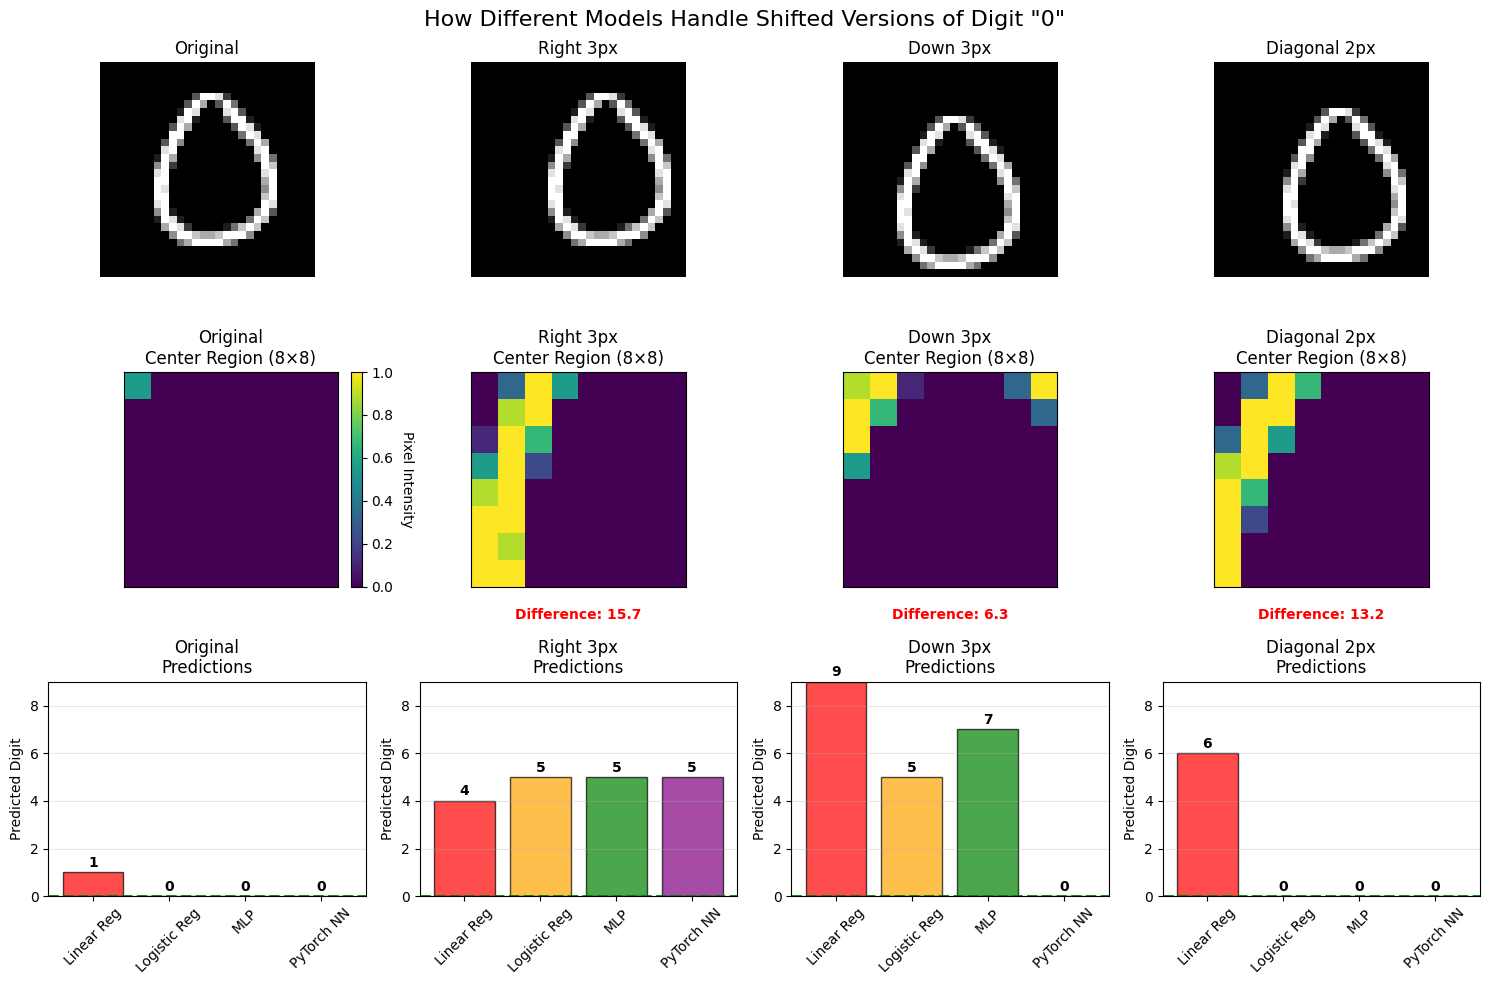


📊 DETAILED PREDICTION RESULTS:
Shift Type      Linear   Logistic   MLP    PyTorch    All Correct?
--------------------------------------------------------------------------------
Original        1        0          0      0          ❌ NO
Right 3px       4        5          5      5          ❌ NO
Down 3px        9        5          7      0          ❌ NO
Diagonal 2px    6        0          0      0          ❌ NO

💡 KEY OBSERVATIONS:
- Even tiny pixel shifts create dramatically different feature vectors
- Classical ML models are very sensitive to spatial transformations
- The same digit shifted by just a few pixels gets different predictions
- This is why we need CNNs with translation invariance!


In [25]:
# Let's demonstrate this more clearly with a specific example
print("DEMONSTRATING THE SPATIAL LIMITATION:")
print("Let's see how our trained models handle shifted versions of the same digit\n")

# Take a test image and create shifted versions
test_idx = 5  # Pick a different test image
original_test_image = X_test_normalized[test_idx].reshape(28, 28)
true_label = y_test[test_idx]

print(f"Original image true label: {true_label}")

# Create shifted versions
import scipy.ndimage as ndimage
shifts = [(0, 0), (0, 3), (3, 0), (2, 2)]
shift_names = ['Original', 'Right 3px', 'Down 3px', 'Diagonal 2px']

# Test each model on these shifted versions
shifted_images = []
for shift in shifts:
    shifted = ndimage.shift(original_test_image, shift, cval=0)
    shifted_images.append(shifted.flatten())

shifted_images = np.array(shifted_images)

# Get predictions from all models
lr_preds = linear_reg.predict(shifted_images)
lr_preds_rounded = np.clip(np.round(lr_preds).astype(int), 0, 9)

logistic_preds = logistic_reg.predict(shifted_images)
logistic_probs = logistic_reg.predict_proba(shifted_images)

mlp_preds = mlp.predict(shifted_images)
mlp_probs = mlp.predict_proba(shifted_images)

# PyTorch predictions
model.eval()
with torch.no_grad():
    torch_inputs = torch.FloatTensor(shifted_images)
    torch_outputs = model(torch_inputs)
    torch_probs = torch.softmax(torch_outputs, dim=1)
    torch_preds = torch_outputs.argmax(dim=1).numpy()

# Visualize results
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle(f'How Different Models Handle Shifted Versions of Digit "{true_label}"', fontsize=16)

# First row: Show the shifted images
for i, (shift_name, shifted_img) in enumerate(zip(shift_names, shifted_images)):
    axes[0, i].imshow(shifted_img.reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'{shift_name}')
    axes[0, i].axis('off')

# Second row: Show pixel differences as heatmaps - much clearer visualization!
# Extract 8x8 center region as 2D array for heatmap visualization
center_region_2d = []
for i, (shift_name, shifted_img) in enumerate(zip(shift_names, shifted_images)):
    # Get center 8x8 region (rows 10-17, cols 10-17)
    img_2d = shifted_img.reshape(28, 28)
    center_8x8 = img_2d[10:18, 10:18]  # Extract center region
    center_region_2d.append(center_8x8)
    
    # Create heatmap
    im = axes[1, i].imshow(center_8x8, cmap='viridis', vmin=0, vmax=1)
    axes[1, i].set_title(f'{shift_name}\nCenter Region (8×8)')
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    
    # Add colorbar for the first subplot
    if i == 0:
        cbar = plt.colorbar(im, ax=axes[1, i], fraction=0.046, pad=0.04)
        cbar.set_label('Pixel Intensity', rotation=270, labelpad=15)
    
    # Add text annotation showing how different this is from original
    if i > 0:
        diff_sum = np.sum(np.abs(center_region_2d[0] - center_8x8))
        axes[1, i].text(0.5, -0.15, f'Difference: {diff_sum:.1f}', 
                        transform=axes[1, i].transAxes, ha='center', 
                        color='red', fontweight='bold')

# Third row: Show model predictions
predictions_data = [
    ('Linear Reg', lr_preds_rounded, 'red'),
    ('Logistic Reg', logistic_preds, 'orange'), 
    ('MLP', mlp_preds, 'green'),
    ('PyTorch NN', torch_preds, 'purple')
]

for i, shift_name in enumerate(shift_names):
    pred_results = []
    colors = []
    labels = []
    
    for model_name, preds, color in predictions_data:
        pred_results.append(preds[i])
        colors.append(color)
        labels.append(model_name)
    
    bars = axes[2, i].bar(labels, pred_results, color=colors, alpha=0.7, edgecolor='black')
    axes[2, i].set_title(f'{shift_name}\nPredictions')
    axes[2, i].set_ylabel('Predicted Digit')
    axes[2, i].set_ylim(0, 9)
    axes[2, i].axhline(y=true_label, color='green', linestyle='--', linewidth=2, label=f'True: {true_label}')
    axes[2, i].tick_params(axis='x', rotation=45)
    axes[2, i].grid(axis='y', alpha=0.3)
    
    # Add prediction values on bars
    for bar, pred in zip(bars, pred_results):
        axes[2, i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                        f'{pred}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed results
print("\n📊 DETAILED PREDICTION RESULTS:")
print("="*80)
print(f"{'Shift Type':<15} {'Linear':<8} {'Logistic':<10} {'MLP':<6} {'PyTorch':<10} {'All Correct?'}")
print("-"*80)

for i, shift_name in enumerate(shift_names):
    lr_pred = lr_preds_rounded[i]
    log_pred = logistic_preds[i] 
    mlp_pred = mlp_preds[i]
    torch_pred = torch_preds[i]
    
    all_correct = all(pred == true_label for pred in [lr_pred, log_pred, mlp_pred, torch_pred])
    status = "✅ YES" if all_correct else "❌ NO"
    
    print(f"{shift_name:<15} {lr_pred:<8} {log_pred:<10} {mlp_pred:<6} {torch_pred:<10} {status}")

print("\n💡 KEY OBSERVATIONS:")
print("- Even tiny pixel shifts create dramatically different feature vectors")
print("- Classical ML models are very sensitive to spatial transformations")
print("- The same digit shifted by just a few pixels gets different predictions")
print("- This is why we need CNNs with translation invariance!")
print("="*80)

## 11. Summary and Next Steps

Congratulations! 🎉 You've successfully implemented and compared four classical machine learning approaches for image classification:

### What We Learned:

1. **Linear Regression**: Completely inappropriate for classification

   - Treats classes as ordered numbers
   - Can predict impossible values
   - Very poor performance

2. **Logistic Regression**: Much better, but limited

   - Proper classification approach
   - Uses probabilities
   - Linear decision boundaries only

3. **Multi-Layer Perceptron (MLP)**: Significant improvement

   - Non-linear decision boundaries
   - Hidden layers add capacity
   - Foundation of neural networks

4. **PyTorch Neural Network**: Modern implementation
   - Industry-standard framework
   - Flexible architecture
   - Better control and understanding

### Key Takeaways:

- Classical ML methods can work on simple image tasks like MNIST
- They struggle with spatial relationships and transformations
- Manual feature engineering is required for complex tasks
- Performance plateaus without understanding image structure

### What's Next? 🚀

In our next session, we'll explore **Convolutional Neural Networks (CNNs)** which solve many of these limitations:

- **Spatial awareness** through convolution operations
- **Translation invariance** - recognizes patterns regardless of position
- **Hierarchical learning** - builds from edges to complex shapes
- **Parameter sharing** - same filter applied across the image
- **Much better performance** on real-world image tasks

Get ready to see the power of deep learning! 🧠✨
